In [13]:

from embedding_dict import EmbeddingDict
import pandas as pd

embedding_file = r'../../online_data/PPI_hein_go_huttlin_rolland_features.tsv' #in this case duncan embeddings
protein_file = 'control_node_names/final_node_to_uniprot.csv'  # Proteins of interest


BIONIC_embeddings = EmbeddingDict(embedding_file)
BIONIC_embeddings.load_embeddings()
BIONIC_embeddings.restructure_bionic_embeddings()


#LEGACY CODE, GENERATING A DICTIONARY OF HGNC TO UNIPROT NAMES FOR ALL PROTEINS:
#THIS USED THE UNIPROT SERVICE
        # df_hgnc_names=pd.DataFrame(BIONIC_embeddings.embeddings_df.columns.tolist(),columns=['HGNC']).to_csv('embedding_cols_HGNC.txt',index=False)
        
            
        # results_df = pd.read_csv('results.txt', sep='\t')
        # hgnc_to_uniprot = dict(zip(results_df['Approved symbol'], results_df['UniProt accession']))
        # import pickle
        # with open('hgnc_to_uniprot.pkl', 'wb') as f:
        #     pickle.dump(hgnc_to_uniprot, f)
import pickle
with open('hgnc_to_uniprot.pkl', 'rb') as f:
    hgnc_to_uniprot = pickle.load(f)
BIONIC_embeddings.protein_mapping=hgnc_to_uniprot
#next filter down to the relevant proteins:
BIONIC_embeddings.rename_col_HGNC_to_UniProt()

Loaded embeddings with shape: (15541, 513)
Converted 14536 column names to UniProt IDs
1005 column names could not be mapped to UniProt IDs


Proteins,P04217,Q9NQ94,P01023,A8K2U0,Q9NPC4,Q9UNA3,Q9NRG9,Q86V21,Q8N5Z0,AAED1,...,O43264,Q9H900,O95229,P98169,Q2QGD7,Q6WRX3,Q9C0D3,Q15942,O43149,Q8IYH5
0,-0.008086,0.022262,-0.041966,-0.011709,-0.005485,-0.015946,-0.016342,-0.017374,-0.006317,-0.028314,...,0.005701,-0.001745,-0.008323,0.007251,0.028109,-0.000309,0.011152,-0.027307,-0.013829,0.018037
1,0.002369,-0.005578,-0.009265,0.052614,0.010454,0.00467,0.006204,0.035657,-0.017967,0.005886,...,0.013925,-0.012128,-0.008309,0.012262,-0.020825,0.015218,0.036036,0.003766,0.037881,-0.01474
2,0.047053,-0.006685,0.035695,0.004567,0.005229,0.005152,0.024225,-0.005586,-0.003388,-0.000038,...,0.005911,-0.008513,-0.025575,0.015049,-0.005403,-0.002493,-0.000267,-0.008782,0.025283,0.011574
3,0.007787,0.00146,0.005769,-0.014267,-0.014211,0.009512,0.024587,0.039682,0.000116,0.021408,...,0.01233,0.002608,-0.001112,0.001316,0.035924,-0.037792,-0.018911,0.025741,-0.026933,0.053823
4,0.007282,-0.003858,-0.012149,-0.010931,-0.017544,-0.017885,-0.020795,-0.003685,-0.012393,-0.00138,...,0.018887,0.020568,0.029935,-0.009527,0.009076,-0.002109,-0.027638,0.006709,-0.033,-0.00326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-0.021375,-0.025041,-0.013674,-0.007582,-0.021342,0.015138,-0.027826,0.018799,-0.004586,-0.009842,...,-0.002532,-0.009752,0.054287,-0.020089,0.016644,0.008499,0.007303,0.002392,0.012687,-0.0152
508,0.009218,-0.012966,-0.003599,0.015965,-0.014107,0.005136,-0.051759,-0.021526,-0.01767,-0.02855,...,-0.017874,-0.001417,0.053593,-0.002141,-0.005481,-0.005689,0.036032,-0.018703,-0.036449,0.039398
509,-0.029097,0.004332,-0.013704,-0.004837,0.00056,-0.010365,0.01475,0.027882,-0.003577,0.00345,...,0.002492,-0.008567,-0.020464,-0.00709,0.005297,0.002033,-0.008557,0.030266,-0.011538,0.02211
510,0.014994,-0.032479,-0.000628,-0.00765,0.007904,-0.024747,-0.018943,-0.033777,0.017194,-0.009834,...,0.020027,0.024418,-0.036086,-0.015073,0.006365,-0.000346,0.027962,-0.012512,0.019786,0.004962


In [14]:
#reducing down to the proteins of interest:
protein_file='control_node_names/final_node_to_uniprot.csv'
#pull out only proteins of interest and put into a dedicated proteins of interest df
prot_list=BIONIC_embeddings.load_protein_list(protein_file, protein_column=1, header=None)
BIONIC_embeddings.filter_embeddings_for_proteins(prot_list)
a_test=BIONIC_embeddings.filtered_embeddings





Loaded 82 proteins of interest
Number of proteins found in embeddings: 61
Number of proteins not found in embeddings: 3
Missing proteins: ['P03956', 'P19419', 'P00403']


non-normed and other similarity metrics not implemented yet


/home/abk397/cellbox_torch/Abdullah_kuziez/Testing_encodings/Duncan_embeddings/embedding_dict.py:214: RuntimeWarning: invalid value encountered in divide
  normed_embeddings=embeddings/np.linalg.norm(embeddings,axis=0,keepdims=True)


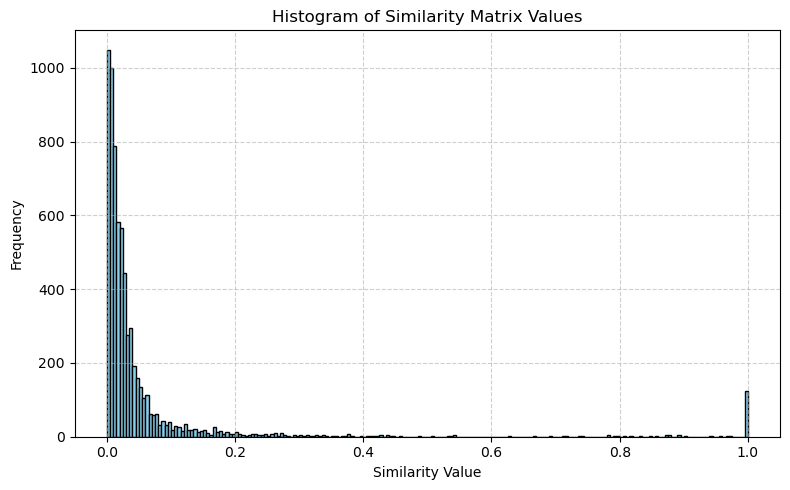

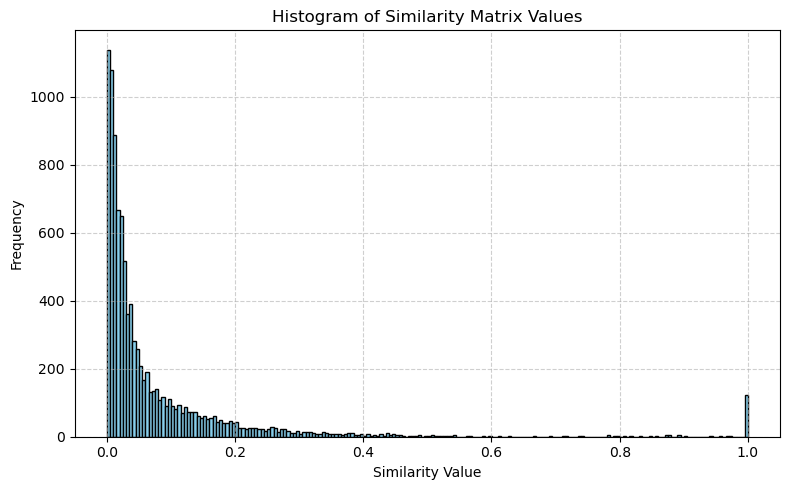

In [15]:
import numpy as np

similarity_matrix = BIONIC_embeddings.generate_similarity_matrix(
    absolute=True, 
    normalize=False,
    fill_missing_with_random=True
)



import matplotlib.pyplot as plt
#prepadding
# Flatten the similarity matrix to 1D array for histogram
sim_values = similarity_matrix.values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(sim_values, bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Similarity Matrix Values')
plt.xlabel('Similarity Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



similarity_matrix = BIONIC_embeddings.pad_matrix(similarity_matrix, 99, 99,mean=0.01, std=0.1)
similarity_matrix = similarity_matrix.abs()
BIONIC_embeddings.similarity_matrix = similarity_matrix

import matplotlib.pyplot as plt

# Flatten the similarity matrix to 1D array for histogram
sim_values = similarity_matrix.values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(sim_values, bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Similarity Matrix Values')
plt.xlabel('Similarity Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

connection_matrix = BIONIC_embeddings.generate_connection_matrix(threshold=0.05)
#matrix needs to be padded to reach 99x99 doing so now





In [16]:
BIONIC_embeddings.save_matrices('BIONIC_melanoma_test_99x99')